# Spotify Good Music Classifier

People like to recommend me new music when I have no time to just sit and relax and actually focus on the music that they send me.

__"Can I build some kind of application that is tuned to my specific music tastes, which will then predict if I like the song or not?"__

Introducing... the GOOD MUSIC CLASSIFIER!!

[Link to the data!](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/)

Spotify has an API (application interface) where we can query data that they keep about EVERY. SINGLE. TRACK on spotify. These attributes include ```acousticness```, ```danceability```, ```energy```, ```instrumentalness```, and so forth. This does __NOT__, unfortunately, include things like... genre or year released, or some other attributes that might have been really good indicators that you might intuitively think of.

In [1]:
dat = read.csv('complete_data.csv')
attach(dat)

In [2]:
names(dat)

[1] "acousticness"     "analysis_url"     "danceability"     "duration_ms"     
 [5] "energy"           "id"               "instrumentalness" "key"             
 [9] "liveness"         "loudness"         "mode"             "speechiness"     
[13] "tempo"            "time_signature"   "track_href"       "type"            
[17] "uri"              "valence"          "class"

For example, for one of the predictors, it seems intuitive that how loud a song is might correlate with how much energy is associated with it. We can see that linear relationship here!

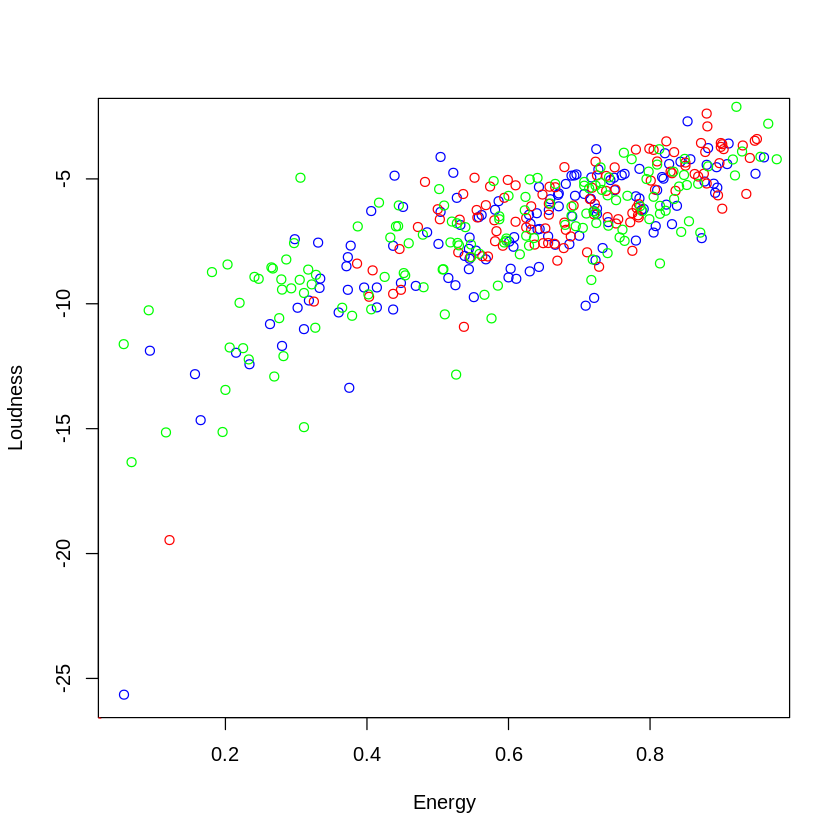

In [3]:
plot(energy[1:131], loudness[1:131], col='blue', xlab="Energy", ylab="Loudness") #good songs
points(energy[132:241], loudness[132:241], col='red') #bad songs
points(energy[242:383], loudness[242:383], col='green') #bad songs

*side fun fact: I was wondering what that sad little blue dot was in the corner so I decided to find out what song that was*

In [4]:
which.min(energy)
dat[235,]

[1] 235

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,class
235,0.994,https://api.spotify.com/v1/audio-analysis/7gpL5CorPuYBthvZkPPFGd,0.161,138798,0.00613,7gpL5CorPuYBthvZkPPFGd,0.846,0,0.0895,-38.027,1,0.039,74.671,1,https://api.spotify.com/v1/tracks/7gpL5CorPuYBthvZkPPFGd,audio_features,spotify:track:7gpL5CorPuYBthvZkPPFGd,0.0363,bad


This is what the data looks like!

In [5]:
dat[1:3,]

acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,class
0.214,https://api.spotify.com/v1/audio-analysis/6rZwsNzGS7nq8qILqdM9kX,0.572,252267,0.532,6rZwsNzGS7nq8qILqdM9kX,0.00e+00,0,0.2840,-6.844,1,0.0316,76.033,4,https://api.spotify.com/v1/tracks/6rZwsNzGS7nq8qILqdM9kX,audio_features,spotify:track:6rZwsNzGS7nq8qILqdM9kX,0.607,good
0.194,https://api.spotify.com/v1/audio-analysis/5P3yUXUC9rZPJPNmYGKEAz,0.565,236733,0.437,5P3yUXUC9rZPJPNmYGKEAz,7.14e-06,6,0.0656,-7.680,0,0.0403,96.132,3,https://api.spotify.com/v1/tracks/5P3yUXUC9rZPJPNmYGKEAz,audio_features,spotify:track:5P3yUXUC9rZPJPNmYGKEAz,0.217,good
0.099,https://api.spotify.com/v1/audio-analysis/3ZGrUoFhNCWmm6sbFAuktX,0.587,241320,0.525,3ZGrUoFhNCWmm6sbFAuktX,2.50e-04,9,0.5570,-9.257,0,0.1980,90.356,4,https://api.spotify.com/v1/tracks/3ZGrUoFhNCWmm6sbFAuktX,audio_features,spotify:track:3ZGrUoFhNCWmm6sbFAuktX,0.323,good


In [6]:
summary(class)

bad good okay 
 110  131  142

I usually sort my playlists by date. I get tired of music that I put on repeat and after a couple of months, it's time to move on and look for new music. I decided to use this to define what I determined to be a good, okay, or bad song.

```good``` songs are ones that have made it from one playlist to a second one. Or just my all-time favorites.

```okay``` songs are ones that were in a playlist, but I've over-played it to the point where it's meh now or just wasn't great enough to make it to the next evolution.

```bad``` songs that I found when searching "Top Country Hits" (and EDM and KPOP)

The idea was to find things about my data that might be able to separate them into classes of good, okay, or bad. So if I take the energy example from earlier I can see that the mean of each class is as follows:

In [7]:
mean(energy[1:131])
mean(energy[132:241])
mean(energy[241:382])

[1] 0.6150992

[1] 0.6841094

[1] 0.5734317

## Let's create some models!

I'm going to try all the classification methods that we learned to see how each one of them compares in this data set.

In [8]:
#Split into test/train
set.seed(1)
indices = sample(382)
trainIndices = indices[1:292]

train = dat[trainIndices,]
test = dat[-trainIndices,]

dim(train)
summary(train$class)

[1] 292  19

bad good okay 
  86  101  105

### Logisitic Regression

In [9]:
names(dat)

[1] "acousticness"     "analysis_url"     "danceability"     "duration_ms"     
 [5] "energy"           "id"               "instrumentalness" "key"             
 [9] "liveness"         "loudness"         "mode"             "speechiness"     
[13] "tempo"            "time_signature"   "track_href"       "type"            
[17] "uri"              "valence"          "class"

In [10]:
logModel = glm(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train, family=binomial)

In [11]:
summary(logModel)


Call:
glm(formula = class ~ acousticness + danceability + energy + 
    duration_ms + instrumentalness + key + liveness + loudness + 
    mode + speechiness + tempo + time_signature + valence, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3077  -0.8488   0.4171   0.7620   1.5510  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       4.293e+00  2.943e+00   1.459 0.144618    
acousticness      1.855e+00  8.644e-01   2.145 0.031914 *  
danceability     -6.490e+00  1.437e+00  -4.517 6.26e-06 ***
energy           -1.881e+00  1.461e+00  -1.287 0.198003    
duration_ms       1.534e-05  4.453e-06   3.444 0.000573 ***
instrumentalness -6.028e-04  1.160e+00  -0.001 0.999585    
key              -1.062e-01  4.217e-02  -2.518 0.011808 *  
liveness          2.702e-01  1.276e+00   0.212 0.832264    
loudness          1.358e-01  8.394e-02   1.618 0.105608    
mode             -6.846e-01  3.334e-01 

In [12]:
logModelProbs = predict(logModel, test, type='response')
logModelPredictions=rep('good', dim(test)[1])
logModelPredictions[logModelProbs<.75]='okay'
logModelPredictions[logModelProbs<.25]='bad'
test$prediction = logModelPredictions
legible = data.frame(test$uri, test$class, test$prediction)

In [13]:
legible[(legible$test.class == 'bad'),]

,test.uri,test.class,test.prediction
31,spotify:track:65hRZOQkVjmBdusz1N7aOv,bad,good
32,spotify:track:5kVAp9lANGadGK1s7mxv0h,bad,okay
33,spotify:track:1Be8liECvEP5NYZjYvukbI,bad,okay
34,spotify:track:7M1PQZeyqslVtY5ZiYBGLo,bad,okay
35,spotify:track:7rdK9NSJIRBZAiXC0vuBS9,bad,okay
36,spotify:track:09ts3GnICqYEU5PkQCpJK3,bad,okay
37,spotify:track:5gfK6bZFaApxdSHsHXrwPD,bad,okay
38,spotify:track:6CyJlVAEFlNdpggOLanytL,bad,okay
39,spotify:track:3LhzpgimYSZhTx5KuchwVX,bad,okay
40,spotify:track:30MM5jWpUmOxtTNd9Ey5LZ,bad,bad


In [14]:
names(legible)

[1] "test.uri"        "test.class"      "test.prediction"

In [15]:
table(logModelPredictions, test$class)
mean(logModelPredictions==test$class)

                   
logModelPredictions bad good okay
               bad    4    1    0
               good   4   19   23
               okay  16   10   14

[1] 0.4065934

As we can see, the logistic model wasn't very good.. But because to be honest, I don't think that running a regular accuracy test like this would be as effective. But this is a 3 class problem, so logistic regression wasn't supposed to be very good in this situation.

### Linear Discriminant Analysis

In [16]:
# install.packages('MASS')
library('MASS')

In [17]:
ldaModel = lda(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train)
ldaModel

Call:
lda(class ~ acousticness + danceability + energy + duration_ms + 
    instrumentalness + key + liveness + loudness + mode + speechiness + 
    tempo + time_signature + valence, data = train)

Prior probabilities of groups:
      bad      good      okay 
0.2945205 0.3458904 0.3595890 

Group means:
     acousticness danceability    energy duration_ms instrumentalness      key
bad     0.1506504    0.6497907 0.6874317    203483.8       0.03023420 5.616279
good    0.2623870    0.5634653 0.6326832    224786.1       0.03560117 4.772277
okay    0.3438728    0.5369143 0.5618695    228823.2       0.02660713 4.961905
      liveness  loudness      mode speechiness    tempo time_signature
bad  0.1666291 -6.508209 0.7209302  0.09032093 122.4198       3.941860
good 0.1620119 -7.170069 0.6534653  0.09166139 121.4994       3.881188
okay 0.1732562 -7.587800 0.6666667  0.06165143 121.5010       3.952381
       valence
bad  0.5274919
good 0.4379158
okay 0.4074419

Coefficients of linear discriminan

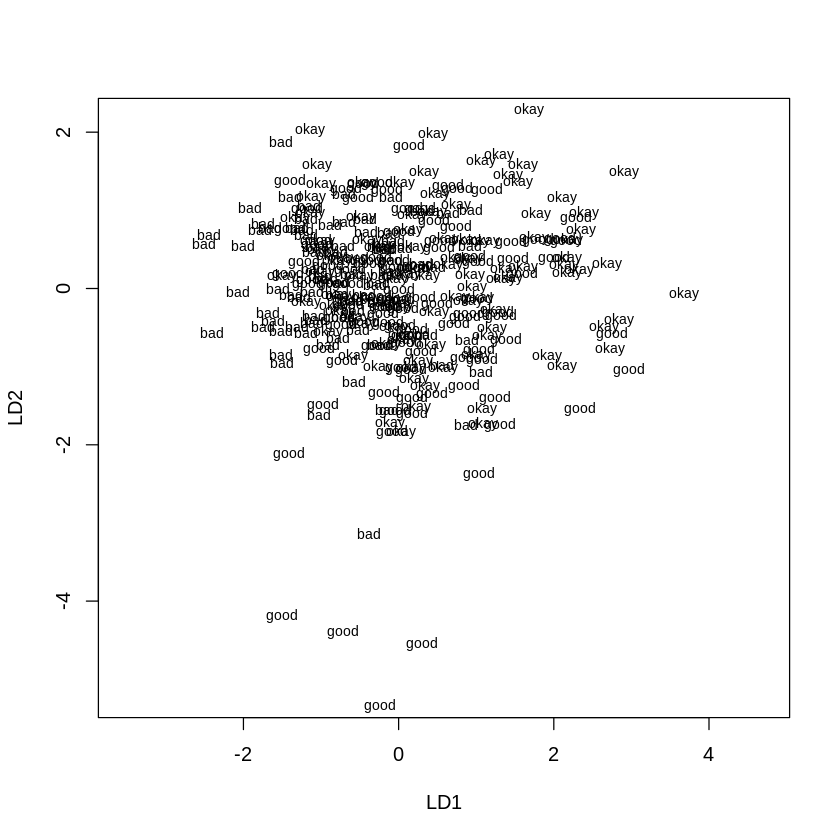

In [18]:
plot(ldaModel)

In [19]:
ldaPredictions = predict(ldaModel, test)
table(ldaPredictions$class, test$class)
mean(ldaPredictions$class==test$class)

      
       bad good okay
  bad   16    7   11
  good   4    5   11
  okay   4   18   15

[1] 0.3956044

In [20]:
sum(ldaPredictions$posterior[,1] > 0.5)

[1] 19

Linear Disciminant Analysis did even worse!

### Quadratic Discriminant Analysis

In [21]:
qdaModel=qda(class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train)

In [22]:
qdaPredict=predict(qdaModel, test)
table(qdaPredict$class, test$class)
mean(qdaPredict$class==test$class)

      
       bad good okay
  bad   14    6   11
  good   2    5    6
  okay   8   19   20

[1] 0.4285714

### K nearest Neighbors

In [23]:
# install.packages('class')
library(class)

In [24]:
KNNTrain = cbind(train$acousticness, train$danceability, 
                 train$energy, train$duration_ms, train$instrumentalness,
                 train$key, train$liveness, train$loudness, train$mode,
                 train$speechiness, train$tempo, train$time_signature,
                 train$valence)
KNNTest = cbind(test$acousticness, test$danceability, 
                 test$energy, test$duration_ms, test$instrumentalness,
                 test$key, test$liveness, test$loudness, test$mode,
                 test$speechiness, test$tempo, test$time_signature,
                 test$valence)

In [25]:
set.seed(1)
KNNModel=knn(KNNTrain, KNNTest, train[['class']], k=25)
table(KNNModel, test$class)
mean(KNNModel==test$class)

# for (i in 1:90){
#     KNNModel=knn(KNNTrain, KNNTest, train[['class']], k=i)
#     table(KNNModel, test$class)
#     print(paste(i,":", mean(KNNModel==test$class)))
# }


        
KNNModel bad good okay
    bad   13    8   10
    good   4   13   12
    okay   7    9   15

[1] 0.4505495

25 seemed like the magic number after looping through 90 different values of K's.

### Random Forest

In [26]:
# install.packages('randomForest')
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [27]:
freq = vector()
for (j in c(1:100)) {
    maxClassification = vector()
    for (i in seq(25, 500, 25)) {
        RFModel = randomForest(class~acousticness+danceability+energy+duration_ms
            +instrumentalness+key+liveness+loudness+mode+speechiness
            +tempo+time_signature+valence, data=dat, subset=trainIndices, mtry=6, ntree=i)
        RFPreds = predict(RFModel, newdata=test)
        table(RFPreds, test$class)
        classAcc = mean(RFPreds==test$class)
        maxClassification=append(maxClassification, classAcc)
    }
    freq = append(freq, (which.max(maxClassification)*25))
}

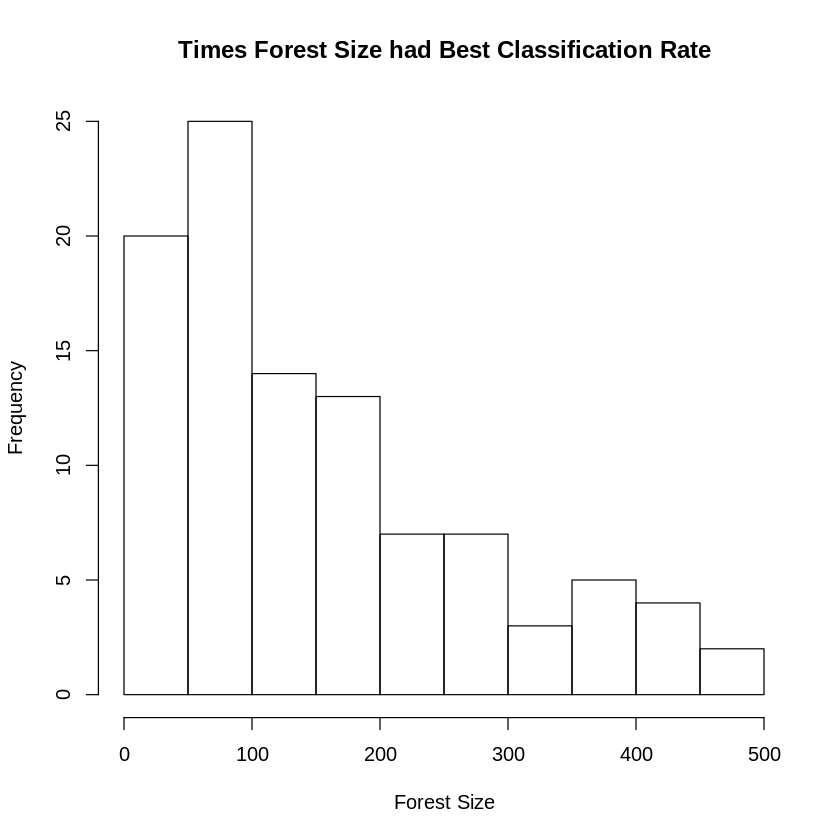

In [28]:
hist(freq, xlab="Forest Size", ylab="Frequency", main="Times Forest Size had Best Classification Rate")

In [29]:
RFModel = randomForest(class~acousticness+danceability+energy+duration_ms
            +instrumentalness+key+liveness+loudness+mode+speechiness
            +tempo+time_signature+valence, data=dat, subset=trainIndices, mtry=13, ntree=25)

In [30]:
RFPreds = predict(RFModel, test)
table(RFPreds, test$class)
mean(RFPreds==test$class)

       
RFPreds bad good okay
   bad   13    6    9
   good   7   11   15
   okay   4   13   13

[1] 0.4065934

,MeanDecreaseGini
acousticness,18.5555117
danceability,29.0495511
energy,15.7086237
duration_ms,20.9369944
instrumentalness,15.4281486
key,8.4286761
liveness,18.0620777
loudness,13.2061642
mode,1.3882858
speechiness,18.2325851


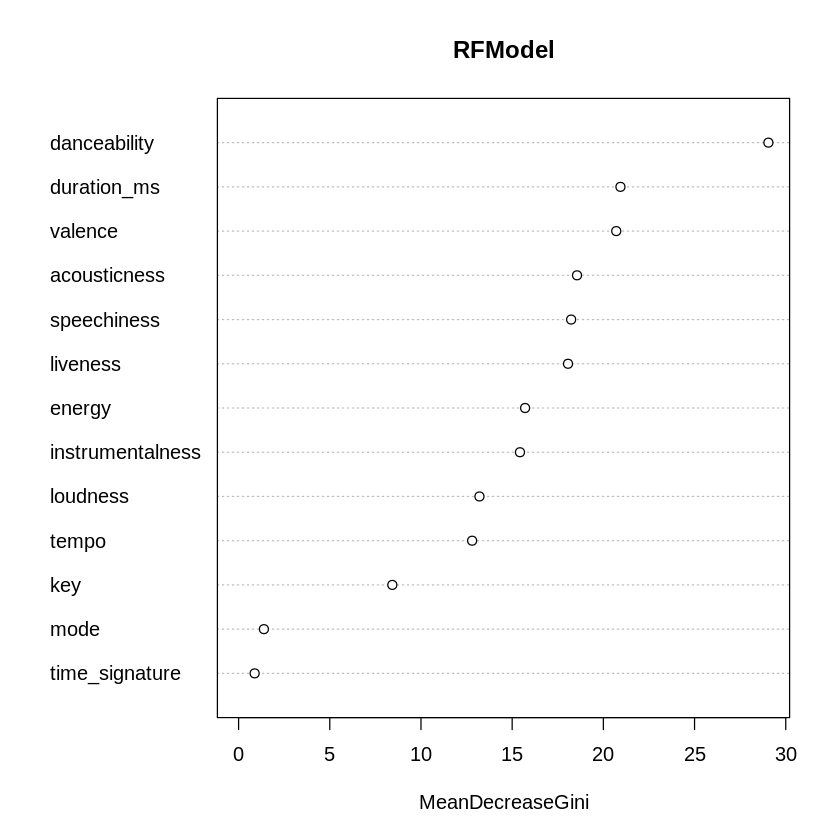

In [31]:
importance(RFModel)
varImpPlot(RFModel)

In short, it's pretty difficult to distinguish the three classes from each other because they are pretty similar and this is a three-class problem. I believe that my results would be better if I had only done the good-bad classification problem.

## Everything we just did but with only Good and Bad Indices!

In [32]:
set.seed(1)
new_dat=read.csv('complete_data_no_ok.csv')
summary(new_dat$class)

bad good 
 110  131

In [33]:
indices = sample(241)
trainIndices = indices[1:193]

train = new_dat[trainIndices,]
test = new_dat[-trainIndices,]

dim(train)
summary(train$class)

[1] 193  19

bad good 
  89  104

### Logistic Regression

In [34]:
logModel = glm(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train, family=binomial)

In [35]:
logModelProbs = predict(logModel, test, type='response')
logModelPredictions=rep('good', dim(test)[1])
logModelPredictions[logModelProbs<.5]='bad'
test$prediction = logModelPredictions
legible = data.frame(test$uri, test$class, test$prediction)

In [36]:
table(logModelPredictions, test$class)
mean(logModelPredictions==test$class)

                   
logModelPredictions bad good
               bad   15    8
               good   6   19

[1] 0.7083333

In [37]:
install.packages('boot')
library(boot)
cvError = cv.glm(dat, logModel)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shor

“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object le

“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object le

“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object le

“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”Warning message in y - yhat:
“longer object length is not a multiple of shorter object le

In [38]:
names(cvError)

[1] "call"  "K"     "delta" "seed"

### Linear Discriminant Analysis

In [39]:
library('MASS')
ldaModel = lda(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train)

ldaPredictions = predict(ldaModel, test)
table(ldaPredictions$class, test$class)
mean(ldaPredictions$class==test$class)

      
       bad good
  bad   15    8
  good   6   19

[1] 0.7083333

### Quadratic Discriminant Analysis

In [40]:
qdaModel=qda(class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train)

qdaPredict=predict(qdaModel, test)
table(qdaPredict$class, test$class)
mean(qdaPredict$class==test$class)

      
       bad good
  bad   17   11
  good   4   16

[1] 0.6875

### K Nearest Neighbors

In [41]:
library(class)

KNNTrain = cbind(train$acousticness, train$danceability, 
                 train$energy, train$duration_ms, train$instrumentalness,
                 train$key, train$liveness, train$loudness, train$mode,
                 train$speechiness, train$tempo, train$time_signature,
                 train$valence)
KNNTest = cbind(test$acousticness, test$danceability, 
                 test$energy, test$duration_ms, test$instrumentalness,
                 test$key, test$liveness, test$loudness, test$mode,
                 test$speechiness, test$tempo, test$time_signature,
                 test$valence)

KNNModel=knn(KNNTrain, KNNTest, train[['class']], k=25)
table(KNNModel, test$class)
mean(KNNModel==test$class)

        
KNNModel bad good
    bad   16    8
    good   5   19

[1] 0.7291667

### Random Forest

In [42]:
library(randomForest)

In [43]:
RFModel = randomForest(class~acousticness+danceability+energy+duration_ms
            +instrumentalness+key+liveness+loudness+mode+speechiness
            +tempo+time_signature+valence, data=new_dat, subset=trainIndices, mtry=13, ntree=25)

RFPreds = predict(RFModel, test)
table(RFPreds, test$class)
mean(RFPreds==test$class)

       
RFPreds bad good
   bad   14    9
   good   7   18

[1] 0.6666667

,MeanDecreaseGini
acousticness,6.6271942
danceability,16.1276936
energy,6.3369746
duration_ms,11.5559281
instrumentalness,9.3811045
key,2.8776029
liveness,7.8985767
loudness,5.4782852
mode,0.1842424
speechiness,9.5089228


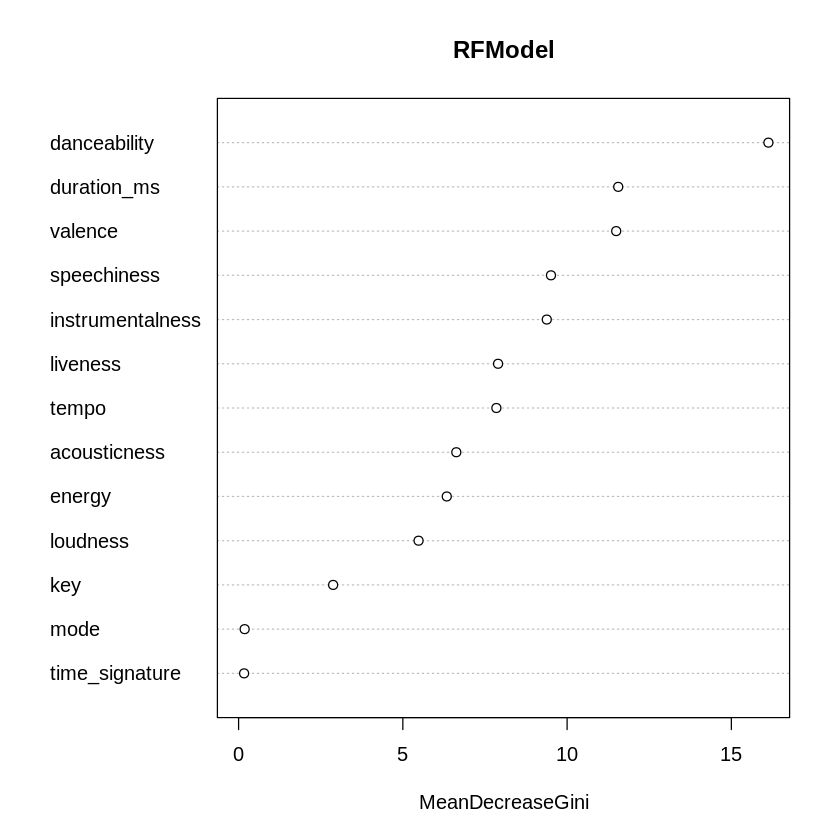

In [44]:
importance(RFModel)
varImpPlot(RFModel)

As hypothesized, my accuracy rates increased by a lot because we only considered the 2-class problem instead of a 3-class problem. There is more separability between just good-bad verses good-okay-bad.

## Acknowledgements
1. Tim Haan for reminding me to do acknowledgements and for always recommending me music (inspiring this project)
2. SacHacks for providing snacks while I worked on the app-y aspect of the project-not-project
3. Spotify for collecting and generating data about each track

## Future Work
1. Run cross validation on each model to get a better statistic to understand the data made.
2. Funk around with Neural Nets because I don't actually care about what factors play into my opinion of good music just give me the good music
3. More App Dev (by not Saturday) so that *you* can make your own models too!